# Chapter 3: Probability mass functions

## Reading

In [1]:
from os.path import basename, exists


def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve

        local, _ = urlretrieve(url, filename)
        print("Downloaded " + local)


download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/thinkstats2.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/thinkplot.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/nsfg.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/first.py")


download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/2002FemPreg.dct")
download(
    "https://github.com/AllenDowney/ThinkStats2/raw/master/code/2002FemPreg.dat.gz"
)

Downloaded first.py


In [3]:
import numpy as np
import nsfg
import first
import thinkstats2
import thinkplot

In [4]:
df_preg = nsfg.ReadFemPreg()
df_live = df_preg.loc[df_preg['outcome'] == 1]

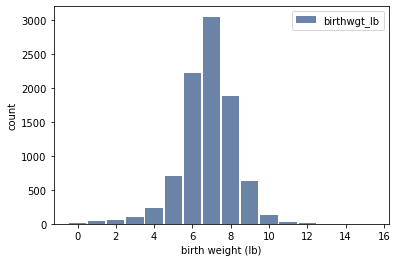

In [5]:
hist = thinkstats2.Hist(df_live['birthwgt_lb'], label='birthwgt_lb')
thinkplot.Hist(hist)
thinkplot.Config(xlabel='birth weight (lb)', ylabel='count')

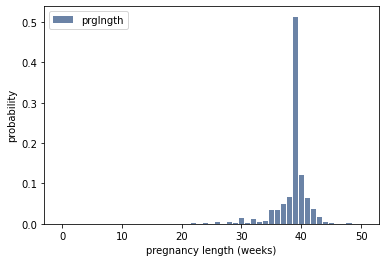

In [6]:
pmf = thinkstats2.Pmf(df_live['prglngth'], label='prglngth')
thinkplot.Hist(pmf)
thinkplot.Config(xlabel='pregnancy length (weeks)', ylabel='probability')

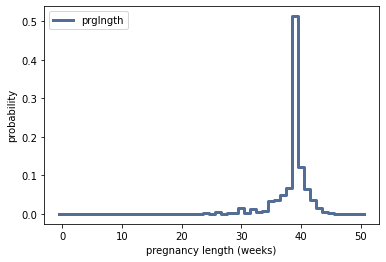

In [7]:
thinkplot.Pmf(pmf)
thinkplot.Config(xlabel='pregnancy length (weeks)', ylabel='probability')

In [8]:
live, firsts, others = first.MakeFrames()

In [9]:
first_pmf = thinkstats2.Pmf(firsts['prglngth'], label='firsts')
other_pmf = thinkstats2.Pmf(others['prglngth'], label='others')

Two ways to plot PMFs for comparison:

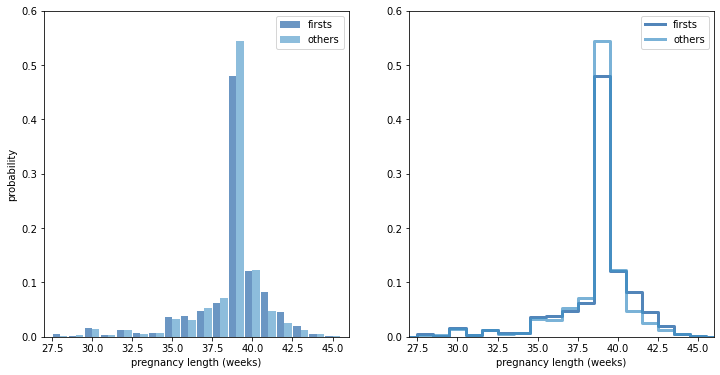

In [11]:
width = 0.45
axis = [27, 46, 0, 0.6]
thinkplot.PrePlot(2, cols=2) # 2 colors, and there will be 2 plots each in their own column
thinkplot.Hist(first_pmf, align='right', width=width)
thinkplot.Hist(other_pmf, align='left', width=width)
thinkplot.Config(xlabel='pregnancy length (weeks)', ylabel='probability', axis=axis)

thinkplot.PrePlot(2) # 2 colors
thinkplot.SubPlot(2) # plot into second subplot
thinkplot.Pmfs([first_pmf, other_pmf])
thinkplot.Config(xlabel='pregnancy length (weeks)', axis=axis)

Difference in probability between the two groups:

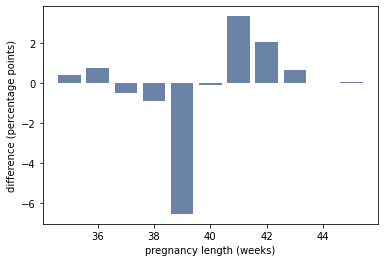

In [12]:
weeks = range(35, 46)
diffs = []
for week in weeks:
    p1 = first_pmf.Prob(week)
    p2 = other_pmf.Prob(week)
    diff = 100 * (p1 - p2)
    diffs.append(diff)
    
thinkplot.Bar(weeks, diffs)
thinkplot.Config(xlabel='pregnancy length (weeks)', ylabel='difference (percentage points)')

Biasing and unbiasing PMFs:

In [13]:
d = {7: 8, 12: 8, 17: 14, 22: 4, 27: 6, 32: 12, 37: 8, 42: 3, 47: 2}

pmf = thinkstats2.Pmf(d, label="actual")

In [14]:
def BiasPmf(pmf, label):
    new_pmf = pmf.Copy(label=label)
    
    for x, p in pmf.Items():
        new_pmf.Mult(x, x) # multiply each observation by the number of observers
    
    new_pmf.Normalize()
    
    return new_pmf

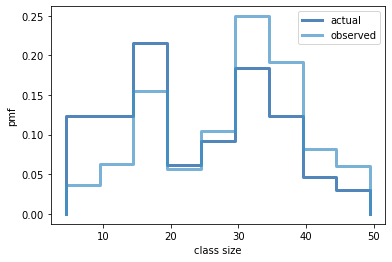

In [15]:
biased_pmf = BiasPmf(pmf, label='observed')

thinkplot.PrePlot(2)
thinkplot.Pmfs([pmf, biased_pmf])
thinkplot.Config(xlabel='class size', ylabel='pmf')

In [16]:
print(f'actual mean: {pmf.Mean()}')
print(f'observed mean: {biased_pmf.Mean()}')

actual mean: 23.692307692307693
observed mean: 29.123376623376625


In [17]:
def UnbiasPmf(pmf, label=None):
    new_pmf = pmf.Copy(label=label)
    
    for x, p in pmf.Items():
        new_pmf[x] *= 1 / x
        
    new_pmf.Normalize()
    
    return new_pmf

In [18]:
unbiased = UnbiasPmf(biased_pmf, label='unbiased')
print(f'unbiased mean: {unbiased.Mean()}')

unbiased mean: 23.69230769230769


## Exercises

**Exercise:** Something like the class size paradox appears if you survey children and ask how many children are in their family. Families with many children are more likely to appear in your sample, and families with no children have no chance to be in the sample.

Use the NSFG respondent variable `numkdhh` to construct the actual distribution for the number of children under 18 in the respondents' households.

Now compute the biased distribution we would see if we surveyed the children and asked them how many children under 18 (including themselves) are in their household.

Plot the actual and biased distributions, and compute their means.

In [19]:
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/2002FemResp.dct")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/2002FemResp.dat.gz")

In [20]:
df_resp = nsfg.ReadFemResp()

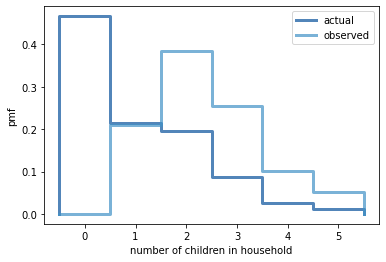

In [22]:
actual_pmf = thinkstats2.Pmf(df_resp['numkdhh'], label='actual')

biased_pmf = BiasPmf(actual_pmf, label='observed')

thinkplot.PrePlot(2)
thinkplot.Pmfs([actual_pmf, biased_pmf])
thinkplot.Config(xlabel='number of children in household', ylabel='pmf')

In [23]:
print(f'Actual mean number of children: {actual_pmf.Mean()}')
print(f'Observed mean number of children: {biased_pmf.Mean()}')

Actual mean number of children: 1.024205155043831
Observed mean number of children: 2.403679100664282


**Exercise:** I started this book with the question, "Are first babies more likely to be late?" To address it, I computed the difference in means between groups of babies, but I ignored the possibility that there might be a difference between first babies and others for the same woman.

To address this version of the question, select respondents who have at least two live births and compute pairwise differences. Does this formulation of the question yield a different result?

Hint: use `nsfg.MakePregMap`:

In [25]:
live, firsts, others = first.MakeFrames()

In [24]:
?nsfg.MakePregMap

Signature: nsfg.MakePregMap(df)
Docstring:
Make a map from caseid to list of preg indices.

df: DataFrame

returns: dict that maps from caseid to list of indices into `preg`
File:      ~/git/2022-summer-homeschool/thinkstats2/nsfg.py
Type:      function


In [31]:
first_map = nsfg.MakePregMap(firsts)
other_map = nsfg.MakePregMap(others)

In [44]:
others.head()

,caseid,pregordr,howpreg_n,howpreg_p,moscurrp,nowprgdk,pregend1,pregend2,nbrnaliv,multbrth,...,laborfor_i,religion_i,metro_i,basewgt,adj_mod_basewgt,finalwgt,secu_p,sest,cmintvw,totalwgt_lb
1,1,2,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,3410.389399,3869.349602,6448.271112,2,9,NaN,7.8750
3,2,2,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,7.0000
4,2,3,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,6.1875
6,6,2,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,4870.926435,5325.196999,8874.440799,1,23,NaN,9.5625
7,6,3,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,4870.926435,5325.196999,8874.440799,1,23,NaN,8.3750


In [51]:
caseid = 2
others.loc[other_map[caseid]]

,caseid,pregordr,howpreg_n,howpreg_p,moscurrp,nowprgdk,pregend1,pregend2,nbrnaliv,multbrth,...,laborfor_i,religion_i,metro_i,basewgt,adj_mod_basewgt,finalwgt,secu_p,sest,cmintvw,totalwgt_lb
3,2,2,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,7226.30174,8567.54911,12999.542264,2,12,NaN,7.0000
4,2,3,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,7226.30174,8567.54911,12999.542264,2,12,NaN,6.1875


In [58]:
differences_arr_list = []
for caseid in other_map:
    differences_arr_list.append(np.array(others.loc[other_map[caseid], 'prglngth']) - np.array(firsts.loc[first_map[caseid], 'prglngth']))

In [59]:
differences_arr = np.concatenate(differences_arr_list)

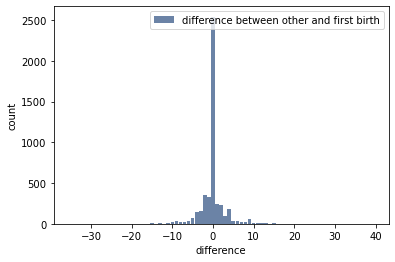

In [60]:
hist = thinkstats2.Hist(differences_arr, label='difference between other and first birth')
thinkplot.Hist(hist)
thinkplot.Config(xlabel='difference', ylabel='count')

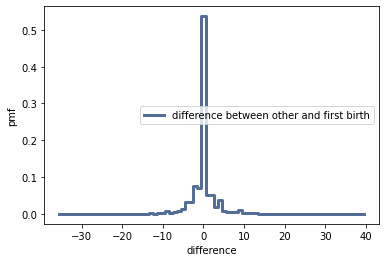

In [61]:
pmf = thinkstats2.Pmf(differences_arr, label='difference between other and first birth')
thinkplot.Pmf(pmf)
thinkplot.Config(xlabel='difference', ylabel='pmf')

**Exercise:** In most foot races, everyone starts at the same time. If you are a fast runner, you usually pass a lot of people at the beginning of the race, but after a few miles everyone around you is going at the same speed.
When I ran a long-distance (209 miles) relay race for the first time, I noticed an odd phenomenon: when I overtook another runner, I was usually much faster, and when another runner overtook me, he was usually much faster.

At first I thought that the distribution of speeds might be bimodal; that is, there were many slow runners and many fast runners, but few at my speed.

Then I realized that I was the victim of a bias similar to the effect of class size. The race was unusual in two ways: it used a staggered start, so teams started at different times; also, many teams included runners at different levels of ability.

As a result, runners were spread out along the course with little relationship between speed and location. When I joined the race, the runners near me were (pretty much) a random sample of the runners in the race.

So where does the bias come from? During my time on the course, the chance of overtaking a runner, or being overtaken, is proportional to the difference in our speeds. I am more likely to catch a slow runner, and more likely to be caught by a fast runner. But runners at the same speed are unlikely to see each other.

Write a function called `ObservedPmf` that takes a `Pmf` representing the actual distribution of runners’ speeds, and the speed of a running observer, and returns a new `Pmf` representing the distribution of runners’ speeds as seen by the observer.

To test your function, you can use `relay.py`, which reads the results from the James Joyce Ramble 10K in Dedham MA and converts the pace of each runner to mph.

Compute the distribution of speeds you would observe if you ran a relay race at 7 mph with this group of runners.

In [57]:
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/relay.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/Apr25_27thAn_set1.shtml")

Downloaded relay.py
Downloaded Apr25_27thAn_set1.shtml


In [62]:
import relay

results = relay.ReadResults()
speeds = relay.GetSpeeds(results)
speeds = relay.BinData(speeds, 3, 12, 100)

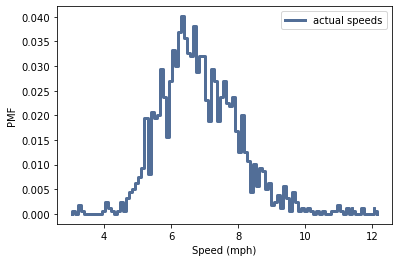

In [75]:
pmf = thinkstats2.Pmf(speeds, label="actual speeds")
thinkplot.Pmf(pmf)
thinkplot.Config(xlabel="Speed (mph)", ylabel="PMF")

In [86]:
def ObservedPmf(observer_speed, pmf):
    """
    Calculate distribution of runners’ speeds as seen by the observer.
    """    
    new_pmf = pmf.Copy(label='observed speeds')
    
    for speed, p in pmf.Items():
        new_pmf[speed] *= np.abs(speed - observer_speed)
        
    new_pmf.Normalize()
    
    return new_pmf

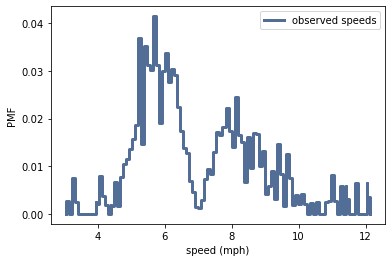

In [87]:
observed_pmf = ObservedPmf(7, pmf)
thinkplot.Pmf(observed_pmf)
thinkplot.Config(xlabel="speed (mph)", ylabel="PMF")

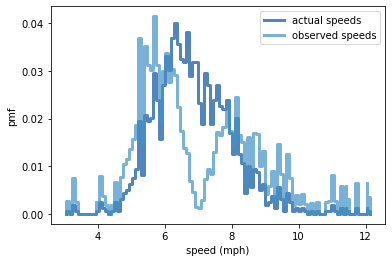

In [88]:
thinkplot.PrePlot(2)
thinkplot.Pmfs([pmf, observed_pmf])
thinkplot.Config(xlabel='speed (mph)', ylabel='pmf')